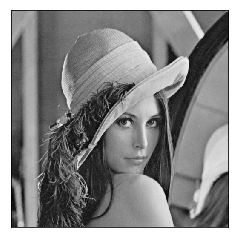

In [59]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('data/lena.jpg', 0) # 打开为灰度图像
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])       # 隐藏坐标线 
plt.show()

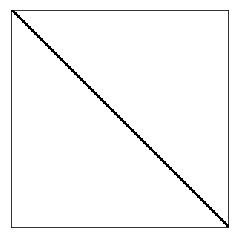

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512), np.uint8) + 255
cv2.line(img, (0, 0), (511, 511), 0, 5)
plt.imshow(img, 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

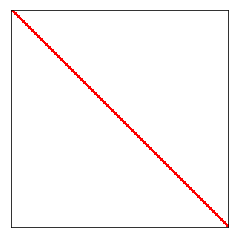

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
cv2.line(img, (0, 0), (511, 511), (0, 0, 255), 5)
b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = np.zeros( (512, 512, 3), np.uint8) + 255
height, width, _ = img.shape
offset = 40
cv2.rectangle(img, (offset, offset), (height-offset, width-offset), 
              (55, 255, 255), 5)

b, g, r = cv2.split(img)
img = cv2.merge([r, g, b])
plt.imshow(img, 'brg')
plt.xticks([]), plt.yticks([])
plt.show()